## Perspective Transform Playground

The purpose of this notebook is to play around a bit with concepts about perspective transform.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib qt

In [2]:
# Read the image
img = mpimg.imread('stop_sign.PNG')

plt.imshow(img)

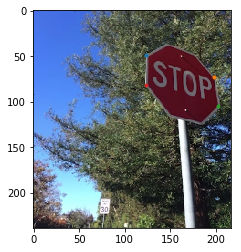

In [5]:
%matplotlib inline

# Source image points
# We need to declare a polygon that we want to use when
# applying the linear transform in order to switch perspectives

plt.imshow(img)
plt.plot(124, 49, '.') # Top left
plt.plot(198, 73, '.') # Top right
plt.plot(203, 105, '.') # Bottom right
plt.plot(123, 81, '.') # Bottom left

*Note*: When you apply a perspective transform, choosing four source points manually, as we did in this video, is often not the best option. There are many other ways to select source points. For example, many perspective transform algorithms will programmatically detect four source points in an image based on edge or corner detection and analyzing attributes like color and surrounding pixels.

In [7]:
# Define warping function
def warp(img):
    # Define calibration box in source (original) and destination (desired or warped) coords
    img_size = (img.shape[1], img.shape[0])
    
    # Four source coords
    src = np.float32(
        [[124, 49],
         [198, 73],
         [203, 105],
         [123, 81]])
    
    # Four desired coords
    dst = np.float32(
        [[124, 49],
         [200, 49],
         [200, 81],
         [124, 81]])
    
    # Compute the perspective transform matrix, M
    M = cv2.getPerspectiveTransform(src, dst)
    
    # Compute the inverse perspective transform matrix
    M_inv = cv2.getPerspectiveTransform(dst, src)
    
    # Create warped image - uses linear interpolation (linear transform)
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    # Create unwarped image from warped
    unwarped = cv2.warpPerspective(warped, M_inv, img_size, flags=cv2.INTER_LINEAR)
    
    return warped, unwarped

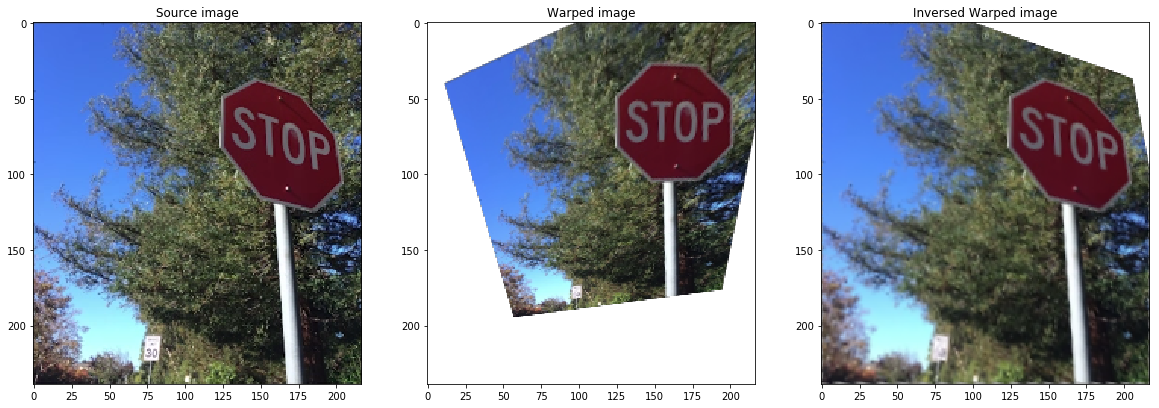

In [9]:
%matplotlib inline

# Get perspective transform
warped_im, inverse_warped_im = warp(img)

# Visualize undistortion
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

ax1.set_title('Source image')
ax1.imshow(img)
ax2.set_title('Warped image')
ax2.imshow(warped_im)
ax3.set_title('Inversed Warped image')
ax3.imshow(inverse_warped_im)